                                        The project aims to analyze air quality trends across various cities 
                                        in India and provide insights into factors influencing air quality.

Getting things ready.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


Loading the dataset.

In [3]:
df = pd.read_csv(r"C:\Users\HP\Documents\EDA\AirQuality_India 2015-2020.csv")

In [4]:
df

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,Visakhapatnam,2020-06-30 20:00:00,9.50,36.00,2.75,25.57,15.85,4.57,0.62,NaN,27.75,NaN,NaN,NaN,51.0,Satisfactory
707871,Visakhapatnam,2020-06-30 21:00:00,17.25,49.25,3.62,33.20,20.62,3.78,0.76,2.02,25.58,NaN,NaN,NaN,51.0,Satisfactory
707872,Visakhapatnam,2020-06-30 22:00:00,36.00,71.00,2.20,30.80,18.20,3.67,0.58,1.77,26.15,NaN,NaN,NaN,50.0,Good
707873,Visakhapatnam,2020-06-30 23:00:00,15.75,63.00,1.02,28.90,16.00,3.80,0.49,0.75,15.82,NaN,NaN,NaN,50.0,Good


Seeing the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  Benzene     544229 non-null  float64
 12  Toluene     487268 non-null  float64
 13  Xylene      252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


In [6]:
df.shape

(707875, 16)

In [7]:
df["Datetime"] = pd.to_datetime(df["Datetime"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   City        707875 non-null  object        
 1   Datetime    707875 non-null  datetime64[ns]
 2   PM2.5       562787 non-null  float64       
 3   PM10        411138 non-null  float64       
 4   NO          591243 non-null  float64       
 5   NO2         590753 non-null  float64       
 6   NOx         584651 non-null  float64       
 7   NH3         435333 non-null  float64       
 8   CO          621358 non-null  float64       
 9   SO2         577502 non-null  float64       
 10  O3          578667 non-null  float64       
 11  Benzene     544229 non-null  float64       
 12  Toluene     487268 non-null  float64       
 13  Xylene      252046 non-null  float64       
 14  AQI         578795 non-null  float64       
 15  AQI_Bucket  578795 non-null  object        
dtypes:

Checking the missing values.

In [9]:
df.isnull().sum()/len(df)*100

City           0.000000
Datetime       0.000000
PM2.5         20.496274
PM10          41.919407
NO            16.476355
NO2           16.545577
NOx           17.407593
NH3           38.501430
CO            12.222073
SO2           18.417517
O3            18.252940
Benzene       23.117923
Toluene       31.164683
Xylene        64.393996
AQI           18.234858
AQI_Bucket    18.234858
dtype: float64

Checking the outliers then will fill the Nan values later.

In [10]:
df.describe()

,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,707875,562787.000000,411138.000000,591243.000000,590753.000000,584651.000000,435333.000000,621358.000000,577502.000000,578667.000000,544229.000000,487268.000000,252046.000000,578795.000000
mean,2018-05-14 02:41:03.445098752,67.622994,119.075804,17.421755,28.885157,32.287565,23.607959,2.183539,14.038307,34.798979,3.087595,8.660927,3.130537,166.413500
min,2015-01-01 01:00:00,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,2017-04-15 23:00:00,26.200000,52.380000,3.840000,10.810000,10.660000,8.120000,0.420000,4.880000,13.420000,0.050000,0.370000,0.100000,79.000000
50%,2018-08-04 20:00:00,46.420000,91.500000,7.960000,20.320000,20.790000,15.380000,0.800000,8.370000,26.240000,0.860000,2.590000,0.790000,116.000000
75%,2019-09-02 14:00:00,79.490000,147.520000,16.150000,36.350000,37.150000,29.230000,1.370000,14.780000,47.620000,2.750000,8.410000,3.120000,208.000000
max,2020-07-01 00:00:00,999.990000,1000.000000,499.990000,499.510000,498.610000,499.970000,498.570000,199.960000,497.620000,498.070000,499.400000,499.990000,3133.000000
std,NaN,74.730496,104.224752,32.095211,29.162194,39.756669,28.831900,10.970514,19.305540,29.806379,16.456599,21.741023,7.834832,162.112729


Now, if mean> median then heavy outlier else median> mean then it is somewhat acceptable.
So, there are some columns that have more than acceptable mean than median whcih are PM2.5, PM10, NOx, AQI .
But they might be relevant as due to diwali, weather changes etc.
Lets understand these columns.

In [11]:
df2  = df.copy()

In [12]:
df2.sample(5)

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
273798,Delhi,2018-04-07 19:00:00,44.48,116.67,15.08,49.99,55.95,47.55,1.23,10.14,68.09,1.25,3.33,0.00,147.0,Moderate
86394,Amritsar,2018-08-12 06:00:00,NaN,31.21,5.84,7.83,13.66,7.35,NaN,6.69,24.01,2.06,1.77,12.10,32.0,Good
288047,Delhi,2019-11-22 12:00:00,192.07,316.48,22.98,73.90,63.92,45.55,1.43,18.33,71.02,5.77,33.65,1.53,374.0,Very Poor
365582,Hyderabad,2016-11-05 16:00:00,47.50,84.75,8.85,11.55,6.12,8.12,0.07,15.50,92.20,0.02,0.57,0.12,137.0,Moderate
245324,Delhi,2015-01-07 09:00:00,206.25,379.69,41.52,37.46,64.79,133.94,8.34,5.59,34.63,6.11,10.42,5.15,343.0,Very Poor


In [13]:
df2["Month"] = df["Datetime"].dt.month

<Axes: ylabel='PM2.5'>

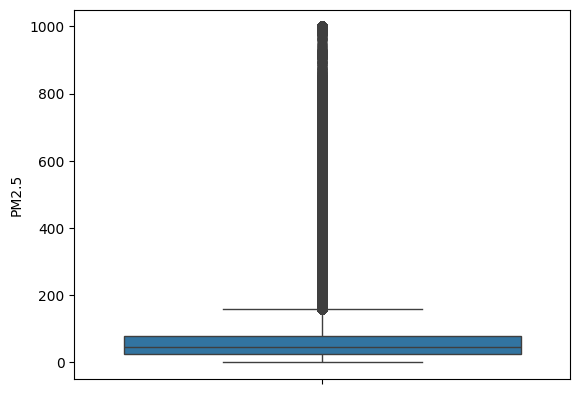

In [14]:
sns.boxplot(df2["PM2.5"])

<Axes: ylabel='PM10'>

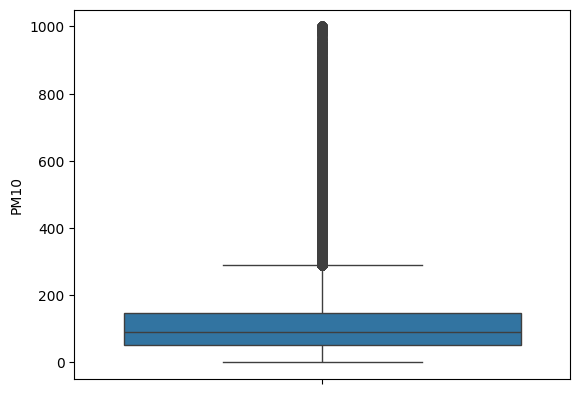

In [15]:
sns.boxplot(df2["PM10"])

<Axes: ylabel='AQI'>

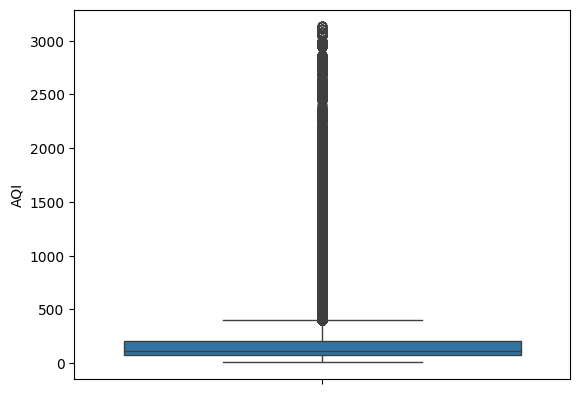

In [16]:
sns.boxplot(df2["AQI"])

<Axes: ylabel='NOx'>

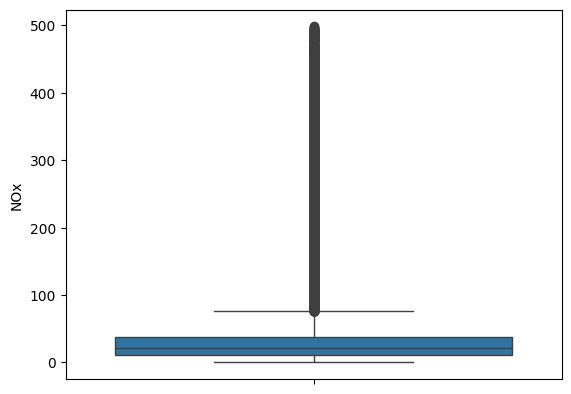

In [17]:
sns.boxplot(df2["NOx"])

As we can see with the boxplots there are plenty of extreme values in our dataset.

Lets create upper and lower limit using the 3 Standard Deviation technique.

In [18]:
df2["NOx"].max()

498.61

In [19]:
df2["PM10"].max()

1000.0

In [20]:
df2["PM2.5"].max()

999.99

In [21]:
df2["AQI"].max()

3133.0

In [22]:
upper_limit = df2["PM2.5"].mean() + 3*df2["PM2.5"].std()
lower_limit = df2["PM2.5"].mean() - 3+df2["PM2.5"].std()

In [23]:
upper_limit 

291.8144819600776

In [24]:
lower_limit

139.3534898276294

As we can see we have the upper limit and lower limit of the PM2.5. Now, these values might be relevant to the dataset as we are dealing
with the air quality which in some cases might be extreme.

In [25]:
df2[(df2["PM2.5"]>upper_limit) | (df2["PM2.5"]<lower_limit)]  

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Month
665,Ahmedabad,2015-01-28 18:00:00,36.60,NaN,0.48,13.58,13.67,NaN,0.48,25.06,87.20,0.00,0.0,0.00,NaN,NaN,1
666,Ahmedabad,2015-01-28 19:00:00,40.63,NaN,0.77,25.43,29.27,NaN,0.77,73.37,53.17,0.00,0.0,0.48,NaN,NaN,1
667,Ahmedabad,2015-01-28 20:00:00,57.07,NaN,5.35,44.17,54.60,NaN,5.35,79.28,28.46,0.45,0.0,2.93,NaN,NaN,1
668,Ahmedabad,2015-01-28 21:00:00,81.30,NaN,23.23,47.66,75.67,NaN,23.23,50.19,30.83,0.27,0.0,5.82,NaN,NaN,1
669,Ahmedabad,2015-01-28 22:00:00,105.53,NaN,43.73,45.93,94.58,NaN,43.73,31.99,53.83,0.00,0.0,6.60,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,Visakhapatnam,2020-06-30 20:00:00,9.50,36.00,2.75,25.57,15.85,4.57,0.62,NaN,27.75,NaN,NaN,NaN,51.0,Satisfactory,6
707871,Visakhapatnam,2020-06-30 21:00:00,17.25,49.25,3.62,33.20,20.62,3.78,0.76,2.02,25.58,NaN,NaN,NaN,51.0,Satisfactory,6
707872,Visakhapatnam,2020-06-30 22:00:00,36.00,71.00,2.20,30.80,18.20,3.67,0.58,1.77,26.15,NaN,NaN,NaN,50.0,Good,6
707873,Visakhapatnam,2020-06-30 23:00:00,15.75,63.00,1.02,28.90,16.00,3.80,0.49,0.75,15.82,NaN,NaN,NaN,50.0,Good,6


In [26]:
del lower_limit, upper_limit

Here there are about 5Lakh+ datapoints which are outliers. But, if i remove these it will not be suitable towards the dataset as it will 
create a significant impact on the datset.

Using the 3std technique, it will also be the same or similar to other features.

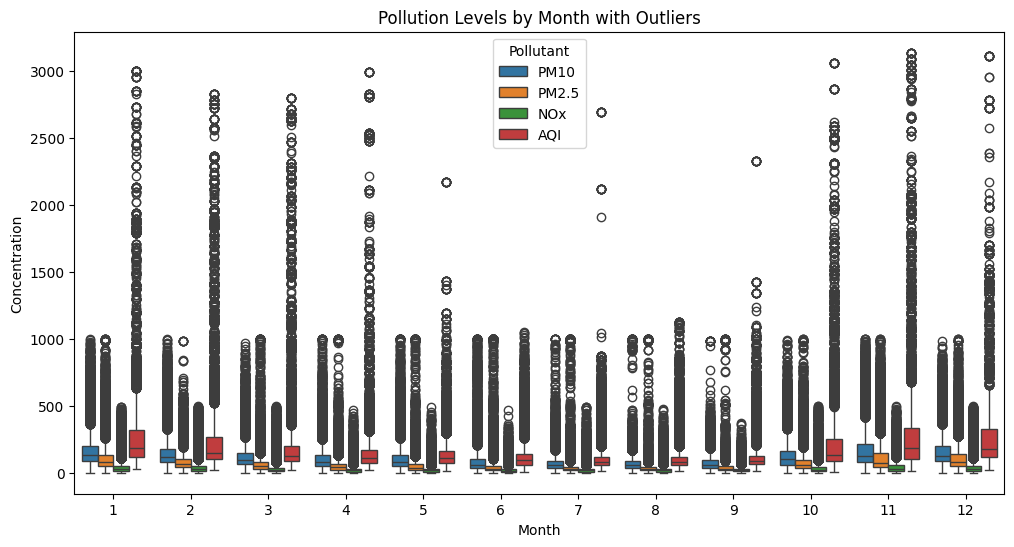

In [27]:
# Melt the data for easier plotting
melted_df = df2.melt(id_vars=['Month'], value_vars=['PM10', 'PM2.5', 'NOx' , 'AQI'], 
                    var_name='Pollutant', value_name='Concentration')

# Boxplot to visualize outliers by month
plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_df, x='Month', y='Concentration', hue='Pollutant')
plt.title('Pollution Levels by Month with Outliers')
plt.xlabel('Month')
plt.ylabel('Concentration')
plt.legend(title='Pollutant')
plt.show()


With this we can clearly see all the outliers of our given features

Lets take a call and cap the necessary values

In [28]:
df2 = df2[df2["AQI"]<=1000]

In [29]:
df2 = df2[df2["PM10"] <= 600]

In [30]:
df2 = df2[df2["PM2.5"] <= 700]

In [31]:
df2 = df2[df2["NOx"] <= 400]

So far we have almost handled the extreme values.

In [32]:
df2

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Month
38289,Ahmedabad,2019-05-15 10:00:00,25.91,84.90,13.85,58.41,44.29,NaN,13.85,140.10,47.69,16.60,83.44,12.12,255.0,Poor,5
38290,Ahmedabad,2019-05-15 11:00:00,27.27,98.29,11.30,71.93,47.98,NaN,11.30,144.20,71.96,13.39,80.38,10.83,255.0,Poor,5
38291,Ahmedabad,2019-05-15 12:00:00,27.27,102.68,8.16,66.79,41.89,NaN,8.16,124.37,88.85,14.22,85.15,16.17,255.0,Poor,5
38292,Ahmedabad,2019-05-15 13:00:00,27.30,102.68,7.52,60.64,38.16,NaN,7.52,170.01,97.76,18.15,84.45,17.66,255.0,Poor,5
38294,Ahmedabad,2019-05-15 15:00:00,23.84,121.94,9.06,70.40,44.67,NaN,9.06,31.13,94.66,21.77,91.95,10.41,255.0,Poor,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,Visakhapatnam,2020-06-30 20:00:00,9.50,36.00,2.75,25.57,15.85,4.57,0.62,NaN,27.75,NaN,NaN,NaN,51.0,Satisfactory,6
707871,Visakhapatnam,2020-06-30 21:00:00,17.25,49.25,3.62,33.20,20.62,3.78,0.76,2.02,25.58,NaN,NaN,NaN,51.0,Satisfactory,6
707872,Visakhapatnam,2020-06-30 22:00:00,36.00,71.00,2.20,30.80,18.20,3.67,0.58,1.77,26.15,NaN,NaN,NaN,50.0,Good,6
707873,Visakhapatnam,2020-06-30 23:00:00,15.75,63.00,1.02,28.90,16.00,3.80,0.49,0.75,15.82,NaN,NaN,NaN,50.0,Good,6


Now, lets look at the missing values.

In [33]:
df2.isnull().sum()/len(df2)*100

City           0.000000
Datetime       0.000000
PM2.5          0.000000
PM10           0.000000
NO             1.465195
NO2            2.185634
NOx            0.000000
NH3           12.051522
CO             0.486096
SO2            4.184180
O3             3.301526
Benzene       11.592785
Toluene       24.343467
Xylene        58.960159
AQI            0.000000
AQI_Bucket     0.000000
Month          0.000000
dtype: float64

<Axes: xlabel='PM10', ylabel='Density'>

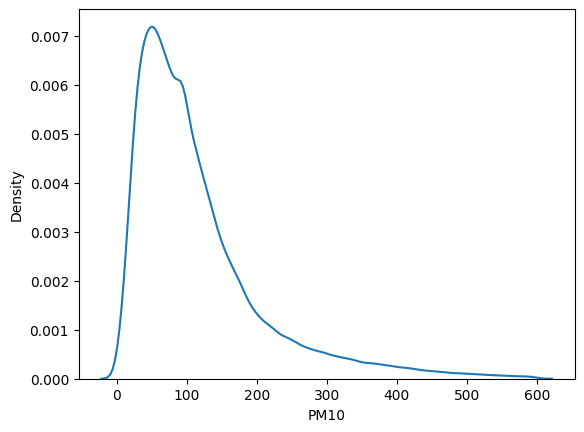

In [34]:
sns.kdeplot(df2["PM10"])

<Axes: xlabel='PM10', ylabel='Density'>

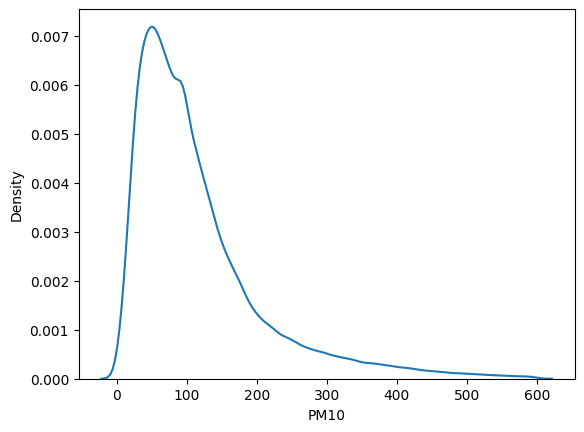

In [35]:
sns.kdeplot(df2["PM10"])

Still our datset is not normally ditributed. But it is somewhat acceptable as we are dealing with the air qualitiy which can be extreme.

Now, lets get back to filling the missing values. As we know our dataset is somewhat skewed we should fill it with the median.

In [36]:
df2.isnull().sum()/len(df2)*100

City           0.000000
Datetime       0.000000
PM2.5          0.000000
PM10           0.000000
NO             1.465195
NO2            2.185634
NOx            0.000000
NH3           12.051522
CO             0.486096
SO2            4.184180
O3             3.301526
Benzene       11.592785
Toluene       24.343467
Xylene        58.960159
AQI            0.000000
AQI_Bucket     0.000000
Month          0.000000
dtype: float64

In [37]:
df2["Xylene"] = df2["Xylene"].fillna(df2["Xylene"].median())

In [38]:
df2["Toluene"] = df2["Toluene"].fillna(df2["Toluene"].median())

In [39]:
df2["Benzene"] = df2["Benzene"].fillna(df2["Benzene"].median())

In [40]:
df2

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Month
38289,Ahmedabad,2019-05-15 10:00:00,25.91,84.90,13.85,58.41,44.29,NaN,13.85,140.10,47.69,16.60,83.44,12.12,255.0,Poor,5
38290,Ahmedabad,2019-05-15 11:00:00,27.27,98.29,11.30,71.93,47.98,NaN,11.30,144.20,71.96,13.39,80.38,10.83,255.0,Poor,5
38291,Ahmedabad,2019-05-15 12:00:00,27.27,102.68,8.16,66.79,41.89,NaN,8.16,124.37,88.85,14.22,85.15,16.17,255.0,Poor,5
38292,Ahmedabad,2019-05-15 13:00:00,27.30,102.68,7.52,60.64,38.16,NaN,7.52,170.01,97.76,18.15,84.45,17.66,255.0,Poor,5
38294,Ahmedabad,2019-05-15 15:00:00,23.84,121.94,9.06,70.40,44.67,NaN,9.06,31.13,94.66,21.77,91.95,10.41,255.0,Poor,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,Visakhapatnam,2020-06-30 20:00:00,9.50,36.00,2.75,25.57,15.85,4.57,0.62,NaN,27.75,1.26,3.79,1.07,51.0,Satisfactory,6
707871,Visakhapatnam,2020-06-30 21:00:00,17.25,49.25,3.62,33.20,20.62,3.78,0.76,2.02,25.58,1.26,3.79,1.07,51.0,Satisfactory,6
707872,Visakhapatnam,2020-06-30 22:00:00,36.00,71.00,2.20,30.80,18.20,3.67,0.58,1.77,26.15,1.26,3.79,1.07,50.0,Good,6
707873,Visakhapatnam,2020-06-30 23:00:00,15.75,63.00,1.02,28.90,16.00,3.80,0.49,0.75,15.82,1.26,3.79,1.07,50.0,Good,6


In [41]:
df2.isnull().sum()/len(df2)*100

City           0.000000
Datetime       0.000000
PM2.5          0.000000
PM10           0.000000
NO             1.465195
NO2            2.185634
NOx            0.000000
NH3           12.051522
CO             0.486096
SO2            4.184180
O3             3.301526
Benzene        0.000000
Toluene        0.000000
Xylene         0.000000
AQI            0.000000
AQI_Bucket     0.000000
Month          0.000000
dtype: float64

In [42]:
df2["NH3"] = df2["NH3"].fillna(df2["NH3"].median())

In [43]:
df2.isnull().sum()/len(df2)*100

City          0.000000
Datetime      0.000000
PM2.5         0.000000
PM10          0.000000
NO            1.465195
NO2           2.185634
NOx           0.000000
NH3           0.000000
CO            0.486096
SO2           4.184180
O3            3.301526
Benzene       0.000000
Toluene       0.000000
Xylene        0.000000
AQI           0.000000
AQI_Bucket    0.000000
Month         0.000000
dtype: float64

In [44]:
df2.dropna(inplace= True)

In [45]:
df2.isnull().sum()/len(df2)*100

City          0.0
Datetime      0.0
PM2.5         0.0
PM10          0.0
NO            0.0
NO2           0.0
NOx           0.0
NH3           0.0
CO            0.0
SO2           0.0
O3            0.0
Benzene       0.0
Toluene       0.0
Xylene        0.0
AQI           0.0
AQI_Bucket    0.0
Month         0.0
dtype: float64

So far our data cleaning and handling missing values has been done.

                                                        Temporal Analysis

1- Monthly Trends of different pollutants.

In [46]:
monthly_trends = df2.groupby('Month')[['PM10', 'PM2.5', 'NOx' , 'AQI']].median()
print(monthly_trends)

          PM10   PM2.5    NOx    AQI
Month                               
1      127.385  70.670  30.80  156.0
2      118.360  58.000  29.83  132.0
3       97.750  42.750  23.41  113.0
4       80.500  33.110  19.68   98.0
5       82.630  32.030  19.58  101.0
6       57.450  23.750  17.66   78.0
7       55.500  23.210  20.88   73.0
8       52.750  22.000  21.70   71.0
9       57.000  25.415  21.24   78.0
10     100.880  48.470  27.18  114.0
11     123.300  64.830  30.54  145.0
12     127.000  70.530  30.40  152.0


<Axes: xlabel='Month'>

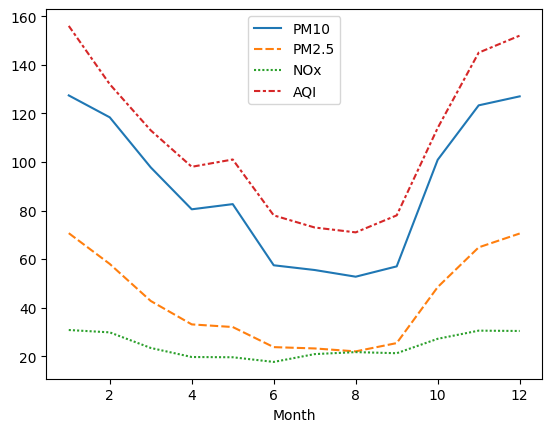

In [47]:
sns.lineplot(data=monthly_trends)

As we can see, in the month of Jan - Mar and Oct - Dec, the spikes are very high. These can be due to winter sesason and diwali. Then suddenly it gets dropped which might be because of season change, tempreture etc. Thus with all these the AQI also gets affected.

2- What are the most polluted seasons with their respective city names?

In [48]:
df2

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Month
38289,Ahmedabad,2019-05-15 10:00:00,25.91,84.90,13.85,58.41,44.29,15.16,13.85,140.10,47.69,16.60,83.44,12.12,255.0,Poor,5
38290,Ahmedabad,2019-05-15 11:00:00,27.27,98.29,11.30,71.93,47.98,15.16,11.30,144.20,71.96,13.39,80.38,10.83,255.0,Poor,5
38291,Ahmedabad,2019-05-15 12:00:00,27.27,102.68,8.16,66.79,41.89,15.16,8.16,124.37,88.85,14.22,85.15,16.17,255.0,Poor,5
38292,Ahmedabad,2019-05-15 13:00:00,27.30,102.68,7.52,60.64,38.16,15.16,7.52,170.01,97.76,18.15,84.45,17.66,255.0,Poor,5
38294,Ahmedabad,2019-05-15 15:00:00,23.84,121.94,9.06,70.40,44.67,15.16,9.06,31.13,94.66,21.77,91.95,10.41,255.0,Poor,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707869,Visakhapatnam,2020-06-30 19:00:00,8.25,33.25,0.35,24.05,13.05,5.55,0.44,1.85,41.38,1.26,3.79,1.07,51.0,Satisfactory,6
707871,Visakhapatnam,2020-06-30 21:00:00,17.25,49.25,3.62,33.20,20.62,3.78,0.76,2.02,25.58,1.26,3.79,1.07,51.0,Satisfactory,6
707872,Visakhapatnam,2020-06-30 22:00:00,36.00,71.00,2.20,30.80,18.20,3.67,0.58,1.77,26.15,1.26,3.79,1.07,50.0,Good,6
707873,Visakhapatnam,2020-06-30 23:00:00,15.75,63.00,1.02,28.90,16.00,3.80,0.49,0.75,15.82,1.26,3.79,1.07,50.0,Good,6


In [49]:
def map_season(month):
    if month in [3,4,5]:
        return "Spring"
    elif month in [ 6,7,8]:
        return "Summer"
    elif month in [9,10,11]:
        return "Fall"
    else:
        return "Winter"

df2["Season"] = df2["Month"].apply(map_season)

Here I have created a season for every month which will allow us to get more insights.

In [50]:
seaonal_trends = df2.groupby(["Season" , "Month" , "City"])["AQI"].mean().reset_index().sort_values("AQI" , ascending= False)

In [51]:
seaonal_trends

,Season,Month,City,AQI
175,Summer,8,Ahmedabad,497.467164
152,Summer,7,Ahmedabad,472.647378
0,Fall,9,Ahmedabad,439.890173
215,Winter,2,Ahmedabad,388.922053
49,Fall,11,Delhi,385.742230
...,...,...,...,...
56,Fall,11,Shillong,26.991150
107,Spring,5,Aizawl,25.082353
171,Summer,7,Shillong,24.000000
130,Summer,6,Aizawl,22.313514


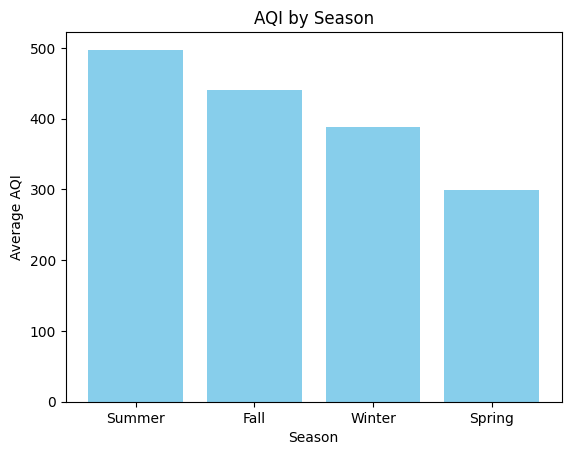

In [52]:
plt.bar(seaonal_trends["Season"], seaonal_trends["AQI"] , color = "skyblue")
plt.xlabel("Season")
plt.ylabel("Average AQI")
plt.title("AQI by Season")
plt.show()

In Fall and Summer we have very high pollution and in the Spring its the least with Ahmdabad as the highest polluted city for every season.

3- Are there specific times of the year when air quality improves?

<Axes: xlabel='Month', ylabel='AQI'>

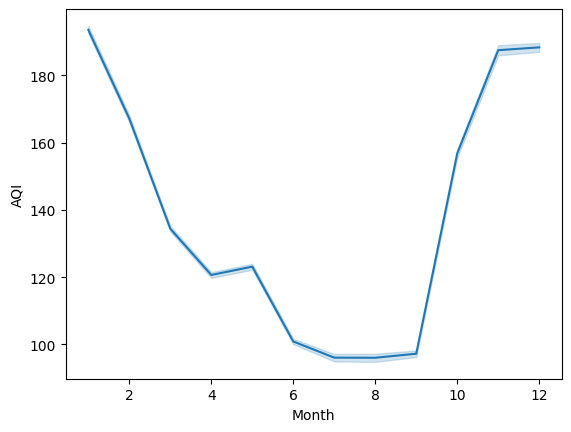

In [53]:
sns.lineplot(data = df2 , x = "Month" , y = "AQI")

During the fall season the air quality improves. 

                                                        City Level Analysis

4- Top 10 cities with highest AQI.

In [54]:
top_10 = df2.groupby("City")["AQI"].mean().sort_values(ascending = False).head(10)

In [55]:
top_10  

City
Ahmedabad       331.791410
Delhi           264.737331
Gurugram        203.561129
Talcher         178.734215
Patna           168.603699
Brajrajnagar    158.191465
Kolkata         139.298116
Guwahati        136.245469
Jaipur          135.522131
Bhopal          133.472227
Name: AQI, dtype: float64

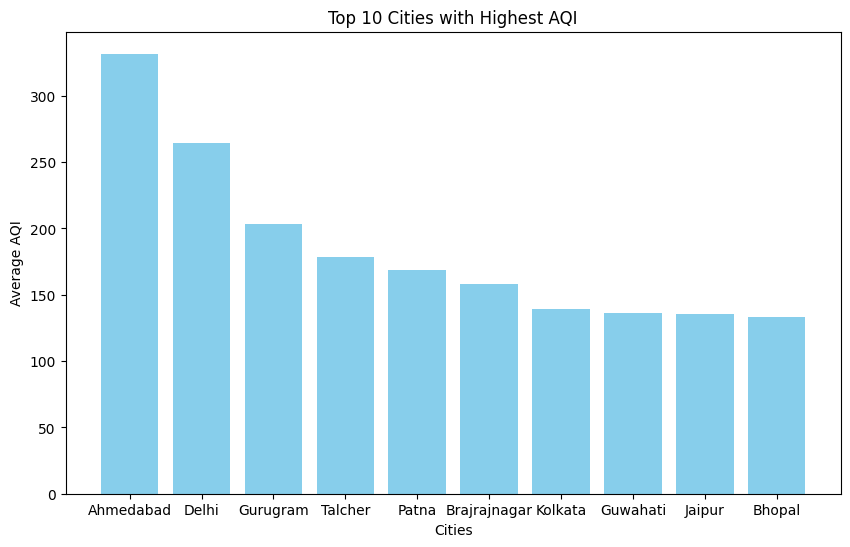

In [56]:
plt.figure(figsize=(10,6))
plt.bar(top_10.index, top_10.values, color = "skyblue")
plt.xlabel("Cities")
plt.ylabel("Average AQI")
plt.title("Top 10 Cities with Highest AQI")
plt.show()

5- Which months have higher AQI and why?

In [57]:
monthly_trends.sort_values(by = "AQI" , ascending = False)

,PM10,PM2.5,NOx,AQI
Month,,,,
1,127.385,70.670,30.80,156.0
12,127.000,70.530,30.40,152.0
11,123.300,64.830,30.54,145.0
2,118.360,58.000,29.83,132.0
10,100.880,48.470,27.18,114.0
3,97.750,42.750,23.41,113.0
5,82.630,32.030,19.58,101.0
4,80.500,33.110,19.68,98.0
6,57.450,23.750,17.66,78.0


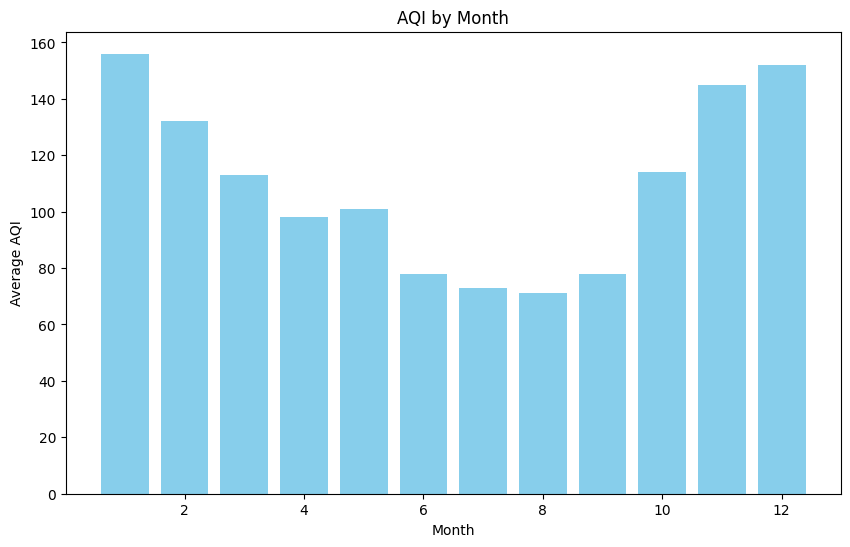

In [58]:
plt.figure(figsize=(10,6))
plt.bar(monthly_trends.index, monthly_trends["AQI"], color = "skyblue")
plt.xlabel("Month")
plt.ylabel("Average AQI")
plt.title("AQI by Month")
plt.show()

As we can see the beginning of the months and the end months have higher AQI. This can be due to festivals like diwali, New Year.

                                                        Correlation Analysis

6- How does AQI correlate with other Air pollutants?

In [59]:
corrrelation = df2[["AQI" , "PM10" , "PM2.5" , "NOx" , "NH3" , "CO" , "SO2" , "O3"]].corr()

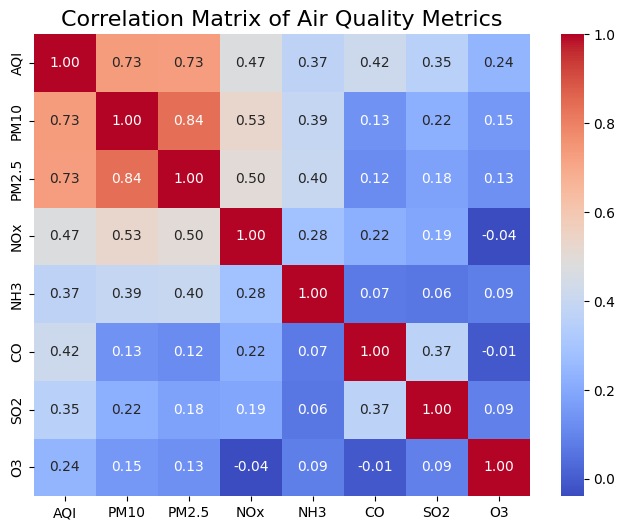

In [60]:

plt.figure(figsize=(8, 6))
sns.heatmap(corrrelation, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Air Quality Metrics", fontsize=16)
plt.show()

With the above heatmap we are able to see the various correlations. 
The AQI has high correlation with PM10 and PM2.5, 
PM10 has high correlation with PM2.5,
and PM2.5 is also correlated with PM10.
All other metrics also have a +ve correlation but not as much as the above.

                                                    Pollution Events

7- What are the spikes in AQI?

In [61]:
high_aqi_cities    = df2.groupby("City")["AQI"].median().sort_values(ascending = False).head(10)

In [62]:
high_aqi_cities

City
Ahmedabad        319.0
Delhi            263.0
Gurugram         177.0
Patna            149.0
Talcher          136.0
Brajrajnagar     126.0
Jaipur           123.0
Bhopal           121.0
Amritsar         106.0
Visakhapatnam    105.0
Name: AQI, dtype: float64

<Axes: xlabel='City'>

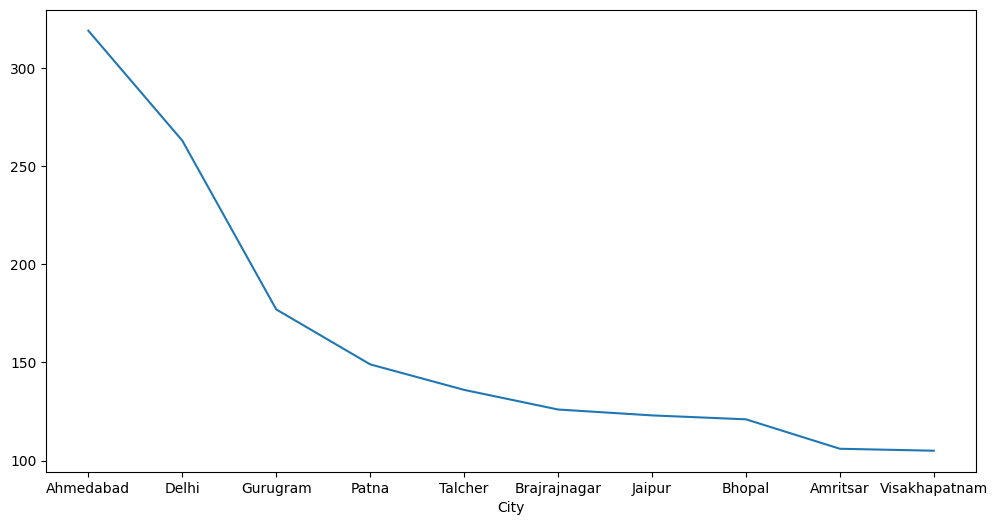

In [63]:
plt.figure(figsize=(12,6))
sns.lineplot(x= high_aqi_cities.index , y = high_aqi_cities.values )


As we can see, the ahmedabad has the highest spike for the year 2016-2020.

8- How often do cities expereince severe and very poor AQI and on which months?

In [64]:
df2["AQI_Bucket"].value_counts()

AQI_Bucket
Satisfactory    120082
Moderate        117555
Poor             33785
Good             24789
Very Poor        24043
Severe            8445
Name: count, dtype: int64

In [65]:
Bad_aqi = (
    df2[df2["AQI_Bucket"].isin(["Poor", "Severe"])]
    .groupby(["City", "Month" , "AQI_Bucket"])
    .size()
    .sort_values(ascending=False)
)

In [66]:
Bad_aqi

City          Month  AQI_Bucket
Delhi         4      Poor          1880
              3      Poor          1817
              5      Poor          1490
              11     Severe        1299
              2      Poor          1248
                                   ... 
Ahmedabad     8      Poor             2
Talcher       1      Severe           2
Brajrajnagar  5      Poor             1
              8      Poor             1
Delhi         7      Severe           1
Length: 201, dtype: int64

As we can see Delhi and Ahmedabad has the most occurences of Severe and Very Poor air quality.

9- How does Air Quality varies accross regions?

In [67]:
df2["City"].value_counts()

City
Delhi                 43629
Hyderabad             37757
Bengaluru             31967
Jaipur                23722
Visakhapatnam         22458
Thiruvananthapuram    20504
Kolkata               17567
Mumbai                16797
Amaravati             16442
Gurugram              13218
Amritsar              12523
Brajrajnagar          12044
Guwahati              11256
Talcher                6953
Ahmedabad              6496
Bhopal                 6355
Chennai                5800
Chandigarh             5717
Coimbatore             5348
Patna                  4542
Shillong               3808
Kochi                  2655
Aizawl                 1141
Name: count, dtype: int64

In [68]:
def map_regions(city):
    if city in ["Delhi","Jaipur","Gurugram","Amritsar", "Chandigarh"]:
        return 'North India'
    
    elif city in ["Hyderabad" , "Bengaluru", "Visakhapatnam", "Thiruvananthapuram" , "Chennai" , "Coimbatore""Kochi" , "Amaravati"]:
        return 'South India'
    
    elif city in ["Mumbai" , "Ahmedabad" ,  "Bhopal" ] :
        return "West India"

    else :
        return "East India"

In [69]:
df2["Regions"] = df2["City"].apply(map_regions)

In [70]:
regional_trends = df2.groupby("Regions")["AQI"].median().sort_values(ascending = False)

In [71]:
regional_trends

Regions
North India    164.0
West India     117.0
East India     104.0
South India     89.0
Name: AQI, dtype: float64

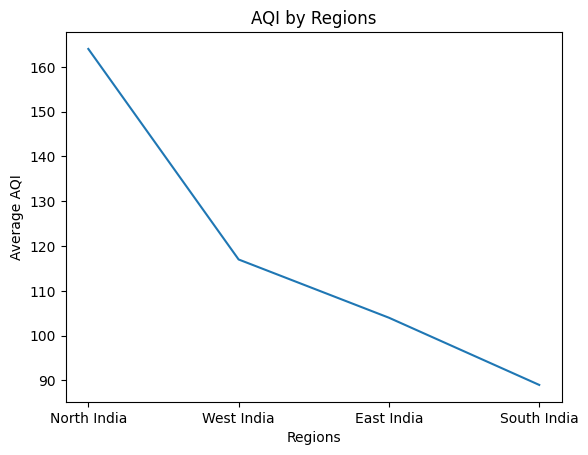

In [72]:
sns.lineplot(x= regional_trends.index , y = regional_trends.values )
plt.xlabel("Regions")
plt.ylabel("Average AQI")
plt.title("AQI by Regions")
plt.show()

In [73]:
regional_trends

Regions
North India    164.0
West India     117.0
East India     104.0
South India     89.0
Name: AQI, dtype: float64

North India has the highest AQI in comparsion to other reigions.

                                                            Conclusion

Northern Regions as Pollution Hotspots
The northern regions of India, particularly Delhi, consistently experience significantly higher AQI levels. This is primarily due to a combination of industrial emissions and agricultural burning during the post-harvest season.

Delhi and Ahmedabad: Cities with Alarming Air Quality
Delhi and Ahmedabad lead in the number of days with Severe and Very Poor air quality, highlighting a critical need for targeted air pollution control measures.

Strong Correlations with Key Pollutants
AQI is strongly correlated with PM10 and PM2.5, which are the most impactful pollutants. Interestingly, PM10 and PM2.5 also show high mutual correlation, reinforcing their combined influence on air quality.

Winter Months with Highest AQI
January, February, November, and December consistently record the highest AQI levels, driven by factors such as low temperatures, reduced wind speeds, and increased emissions from heating and festivals.

Top Polluted Cities
Delhi, Ahmedabad, and Gurugram rank as the cities with the highest overall AQI, indicating persistent air quality challenges.

Air Quality Improvements in Monsoon
Significant improvements in AQI are observed during the months of July, August owing to increased rainfall and stronger winds that help disperse pollutants.

                                                            Future Scope

Building predictive models to forecast AQI levels using machine learning.

Expanding the dataset to include real-time AQI monitoring.